In [155]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Вводные данные

In [156]:
date_name = "Дата"
y_name = "Значение инфляции"
protected_columns = "Долг!;Реальный M2 справочно"

max_lag = 20

protected_columns = protected_columns.split(';')
protected_columns

['Долг!', 'Реальный M2 справочно']

In [161]:
df = pd.read_excel("data.xlsx")
df_final = df.copy()
X_columns = df.columns.tolist()

columns_to_drop = protected_columns + [y_name, date_name]

#print(columns_to_drop)

for col in columns_to_drop:
    try:
        X_columns.remove(col)
    except:
        print(X_columns)
        print(col)

X_columns

['Значение М2',
 'Динамика М2',
 'сдвиг М2 6 мес',
 'Динамика USD',
 'Динамика USD (сдвиг 6 мес)',
 'Ключевая ставка',
 'Срвзвеш кред.ставка более 1 года физлица',
 'Срвзвеш кред.ставка более 1 года организации']

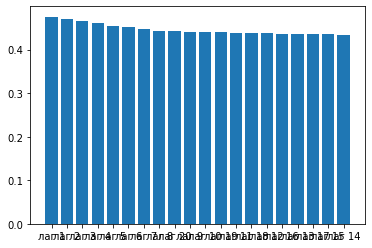

Значение М2 лаг 1 0.4756545283276344
Значение М2_lag_d_1 1
Значение М2_lag_d_1


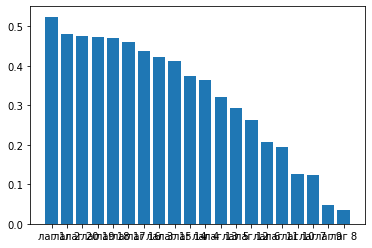

Динамика М2 лаг 1 0.5246998984764455
Динамика М2_lag_d_1 1
Динамика М2_lag_d_1


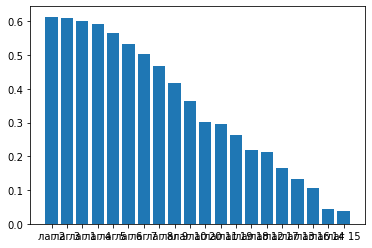

сдвиг М2 6 мес лаг 2 0.6135098118677522
сдвиг М2 6 мес_lag_d_2 2
сдвиг М2 6 мес_lag_d_2


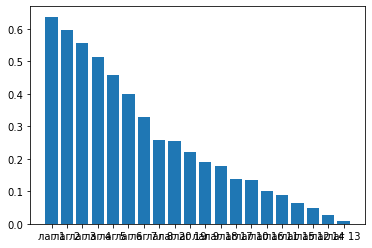

Динамика USD лаг 1 0.6370935178979189
Динамика USD_lag_d_1 1
Динамика USD_lag_d_1


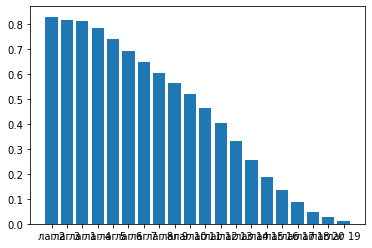

Динамика USD (сдвиг 6 мес) лаг 2 0.8279289685003415
Динамика USD (сдвиг 6 мес)_lag_d_2 2
Динамика USD (сдвиг 6 мес)_lag_d_2


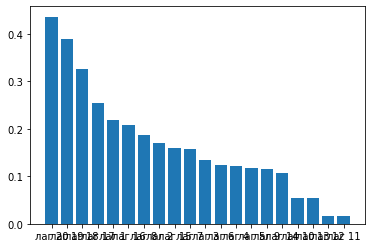

Ключевая ставка лаг 20 0.4357261198202692
Ключевая ставка_lag_d_20 20
Ключевая ставка_lag_d_20


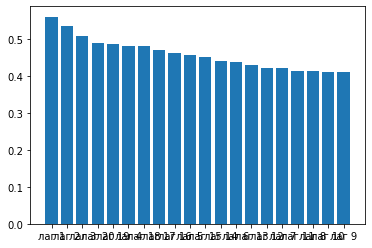

Срвзвеш кред.ставка более 1 года физлица лаг 1 0.5612689512802828
Срвзвеш кред.ставка более 1 года физлица_lag_d_1 1
Срвзвеш кред.ставка более 1 года физлица_lag_d_1


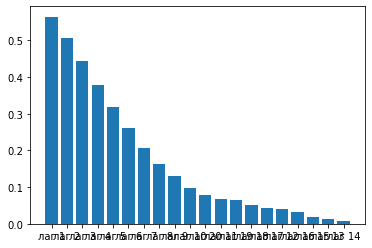

Срвзвеш кред.ставка более 1 года организации лаг 1 0.5641545066225658
Срвзвеш кред.ставка более 1 года организации_lag_d_1 1
Срвзвеш кред.ставка более 1 года организации_lag_d_1


In [159]:
#добавить смещение вверх
#добавить знаки корреляции

best_1_lags_names = []
best_1_lags_corr = []

for x in X_columns:
    df_x = df.loc[:, [date_name, y_name, x]]
    df_x = df_x.dropna()
    
    for i in range(1, max_lag_down+1):
        df_x[f"{x}_lag_d_{i}"] = df_x[x].shift(i)
        
    df_x = df_x.dropna()
    df_x_corr = df_x.corr()
    
    cor_series = abs(df_x_corr.iloc[2:, 0])
    #lags_names = [f"лаг {i}" if i > 0 else "лаг" for i in range(len(cor_series))]
    lags_names = [f"лаг {i}" for i in range(1, len(cor_series)+1)]
    cor_series.index = lags_names
    
    cor_series = cor_series.sort_values(ascending=False)
    
#     top_3_names = cor_series.head(3).index.tolist()
#     best_3_lags_names.append(top_3_names)

#     top_3_corr = cor_series.head(3).values.tolist()
#     best_3_lags_corr.append(top_3_corr)
    
    plt.bar(cor_series.index, cor_series)
    plt.show()
    
    top_1_names = cor_series.head(1).index.tolist()[0]
    best_1_lags_names.append(top_1_names)

    top_1_corr = cor_series.head(1).values.tolist()[0]
    best_1_lags_corr.append(round(top_1_corr, 3))
    
    best_1_lags_names.append(round(top_3_corr[0], 3))
    best_1_lags_corr.append(top_3_names[0])
    
    print(x, top_1_names, top_1_corr)
    
    name_transform = top_1_names.split()
    best_lag_num = 0
    
    if len(name_transform) == 2:
        best_lag_num = name_transform[1]
        
    
    top_1_names_origin = df_x.columns.tolist()[int(best_lag_num)+2]
    print(top_1_names_origin, best_lag_num)
    
    if int(best_lag_num) != 0:
        print(top_1_names_origin)
        df_final = df_final.merge(df_x[[date_name, top_1_names_origin]], on=date_name, how = "left")
    
    

In [160]:
df_final

,Дата,Значение инфляции,Значение М2,Динамика М2,Реальный M2 справочно,сдвиг М2 6 мес,Динамика USD,Динамика USD (сдвиг 6 мес),Долг!,Ключевая ставка,Срвзвеш кред.ставка более 1 года физлица,Срвзвеш кред.ставка более 1 года организации,Значение М2_lag_d_1,Динамика М2_lag_d_1,сдвиг М2 6 мес_lag_d_2,Динамика USD_lag_d_1,Динамика USD (сдвиг 6 мес)_lag_d_2,Ключевая ставка_lag_d_20,Срвзвеш кред.ставка более 1 года физлица_lag_d_1,Срвзвеш кред.ставка более 1 года организации_lag_d_1
0,NaT,NaN,NaN,NaN,NaN,NaN,NaN,0.005480,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaT,NaN,NaN,NaN,NaN,NaN,NaN,-0.020683,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaT,NaN,NaN,NaN,NaN,NaN,NaN,-0.034913,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaT,NaN,NaN,NaN,NaN,NaN,NaN,-0.033205,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaT,NaN,NaN,NaN,NaN,NaN,NaN,-0.056648,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133,2021-08-01,0.067,59379.7,0.085802,0.018802,NaN,-0.003133,NaN,0.128579,6.50,10.75,7.69,59583.9,0.095441,NaN,0.032368,NaN,6.50,10.18,7.64
134,2021-09-01,0.074,59816.9,0.081793,0.007793,NaN,-0.007046,NaN,0.131693,6.50,10.79,8.37,59379.7,0.085802,NaN,-0.003133,NaN,6.25,10.75,7.69
135,2021-10-01,0.081,60606.2,0.081792,0.000792,NaN,-0.077685,NaN,0.133075,7.25,NaN,NaN,59816.9,0.081793,NaN,-0.007046,NaN,6.25,NaN,NaN
136,2021-11-01,NaN,NaN,NaN,NaN,NaN,-0.111055,NaN,NaN,7.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [154]:
df_final.to_excel("result.xlsx")

In [133]:
best_3_lags_corr

[[0.4756545283276344, 0.4706873092478499, 0.4654546056239078],
 [0.5246998984764455, 0.4815826321368256, 0.4759302279178496],
 [0.6135098118677522, 0.6084997207486598, 0.6016802974738761],
 [0.6370935178979189, 0.5957265875600536, 0.5567849578684313],
 [0.8279289685003415, 0.8159655548099136, 0.8107773366083806],
 [0.4357261198202692, 0.3887001609679564, 0.3264100864294281],
 [0.5612689512802828, 0.5349988976334467, 0.5086364420962199],
 [0.5641545066225658, 0.5073219500809633, 0.4441788470003818]]